In [8]:
#face detect using mtcnn
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
import pandas as pd

In [9]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
    
    # load image from file
    pic = pyplot.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pic)

    #SARAH ADDED TO SEE
    print(results)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pic[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

[{'box': [167, 104, 32, 37], 'confidence': 0.9998979568481445, 'keypoints': {'left_eye': (176, 116), 'right_eye': (192, 115), 'nose': (184, 124), 'mouth_left': (177, 131), 'mouth_right': (191, 131)}}]


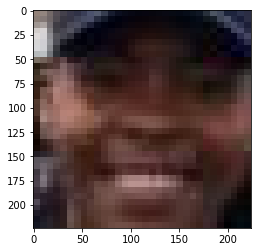

In [32]:
#load pic
pic = extract_face('face_3.jpg')
p = pyplot.imread('face_3.jpg')
pyplot.imshow(pic)
# pyplot.imshow(p)

In [11]:
#load filenames via pandas
pic_list = pd.read_csv('test/pof_test_faces.csv')
pic_list.head()

,image
0,face_2.jpg
1,face_3.jpg
2,face_5.jpg
3,face_7.jpg
4,face_9.jpg


In [28]:
# base func extract face
box_list = {}
def detect_face(filename, required_size=(224, 224)):
    #EMPTY SET TO SAVE RESULTS

    # load image from file
    pic = pyplot.imread(filename)
    
    # create the detector, using default weights
    detector = MTCNN()
    
    # detect faces in the image
    results = detector.detect_faces(pic)
    
    #APPEND box_list(comparing arrays to see if difference in box)
    box_list.update({filename:results[0]['box']})
    
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    
    # extract the face
    face = pic[y1:y2, x1:x2]
    
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

In [35]:
#create a loop to extract faces from all photos

for x in range(len(pic_list)):
    
    try:
        p = pic_list['image'][x]
        detect_face(f'test/profile_photos/{p}')
    
    except Exception as e:
        box_list.update({f'test/profile_photos/{p}':[0,0,0,0]})



# p = detect_face('face_3.jpg')
# pyplot.imshow(p)


In [37]:
box_list

{'test/profile_photos/face_2.jpg': [121, 104, 112, 143],
 'test/profile_photos/face_3.jpg': [167, 104, 32, 37],
 'test/profile_photos/face_5.jpg': [197, 205, 67, 87],
 'test/profile_photos/face_7.jpg': [108, 172, 92, 120],
 'test/profile_photos/face_9.jpg': [64, 27, 142, 154],
 'test/profile_photos/no_face_1.jpg': [318, 78, 19, 24],
 'test/profile_photos/no_face_4.jpg': [0, 0, 0, 0],
 'test/profile_photos/no_face_6.jpg': [0, 0, 0, 0],
 'test/profile_photos/no_face_8.jpg': [0, 0, 0, 0],
 'test/profile_photos/no_face_10.jpg': [0, 0, 0, 0]}

In [40]:
#checking training data
train_data = pd.read_csv('train/pof_train_faces.csv')
train_data.head()

,image,label
0,face_1.jpg,face
1,face_4.jpg,face
2,face_6.jpg,face
3,face_7.jpg,face
4,face_8.jpg,face


In [41]:
#create loop through file names
for x in range(len(train_data)):
    
    try:
        p = train_data['image'][x]
        detect_face(f'test/profile_photos/{p}')
    
    except Exception as e:
        box_list.update({f'test/profile_photos/{p}':[0,0,0,0]})

In [42]:
box_list

{'test/profile_photos/face_2.jpg': [121, 104, 112, 143],
 'test/profile_photos/face_3.jpg': [167, 104, 32, 37],
 'test/profile_photos/face_5.jpg': [197, 205, 67, 87],
 'test/profile_photos/face_7.jpg': [108, 172, 92, 120],
 'test/profile_photos/face_9.jpg': [64, 27, 142, 154],
 'test/profile_photos/no_face_1.jpg': [318, 78, 19, 24],
 'test/profile_photos/no_face_4.jpg': [0, 0, 0, 0],
 'test/profile_photos/no_face_6.jpg': [0, 0, 0, 0],
 'test/profile_photos/no_face_8.jpg': [0, 0, 0, 0],
 'test/profile_photos/no_face_10.jpg': [0, 0, 0, 0],
 'test/profile_photos/face_1.jpg': [0, 0, 0, 0],
 'test/profile_photos/face_4.jpg': [0, 0, 0, 0],
 'test/profile_photos/face_6.jpg': [0, 0, 0, 0],
 'test/profile_photos/face_8.jpg': [0, 0, 0, 0],
 'test/profile_photos/face_13.jpg': [0, 0, 0, 0],
 'test/profile_photos/face_14.jpg': [0, 0, 0, 0],
 'test/profile_photos/face_16.jpg': [0, 0, 0, 0],
 'test/profile_photos/face_17.jpg': [0, 0, 0, 0],
 'test/profile_photos/face_20.jpg': [0, 0, 0, 0],
 'test/pro